In [1]:
import tensorflow as tf
import numpy as np

2023-05-08 11:43:12.224959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
classes = [
'Tomato___Late_blight',
'Tomato___healthy',
'Tomato___Early_blight',
'Tomato___Septoria_leaf_spot',
'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
'Tomato___Bacterial_spot',
'Tomato___Target_Spot',
'Tomato___Tomato_mosaic_virus',
'Tomato___Leaf_Mold',
'Tomato___Spider_mites Two-spotted_spider_mite'
]

# ImageDatagenerator
 > this tool is used in tensorflow to fetch images from a specified directory
 > apply transformations on it such as rescaling, zooming, flipping shuffling e.t.c
 # Our dataset
 > our dataset has already been split into two folders
 * train
 * validation
> Each of the following folder contains the following folders
* Tomato___Late_blight
* Tomato___healthy
* Tomato___Early_blight
* Tomato___Septoria_leaf_spot
* Tomato___Tomato_Yellow_Leaf_Curl_Virus
* Tomato___Bacterial_spot
* Tomato___Target_spot
* Tomato___Tomator_mosaic_virus
* Tomato___Leaf_Mold
* Tomato___Spider_mites Two-spotted_spider_mite


> Each of the folder contains images that correspond to the folder name 

# in these Experiment we would extract features from the images using the 5x5 and use the features to train the svm

In [3]:
BATCH_SIZE = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/Users/msughter/Downloads/tomato/train'
validation_dir = '/Users/msughter/Downloads/tomato/val'
# Image datagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory(
     train_dir,
        batch_size=BATCH_SIZE,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
)

validation_datagenerator = validation_datagen.flow_from_directory(
    validation_dir,
     target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
        batch_size=BATCH_SIZE
)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


* we would load our the model with the 5x5 feature extractor
* drop the fully connected layer
* use the feature extractor to get features from the images

In [5]:
model_dir = '/Users/msughter/Downloads/model_(5X5)_convolution_classifier.h5'
model = tf.keras.models.load_model(model_dir)

2023-05-08 11:47:17.674356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 220, 220, 64)      4864      
                                                                 
 batch_normalization_10 (Bat  (None, 220, 220, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 64)      36928     
                                                                 
 batch_normalization_11 (Bat  (None, 218, 218, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 109, 109, 64)     0         
 2D)                                                             
                                                      

In [7]:
# we would drop the last dense layer to get our feature extractor
extractor = tf.keras.Model(inputs=model.input,outputs=[model.layers[-2].output])
extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLayer  [(None, 224, 224, 3)]    0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 64)      4864      
                                                                 
 batch_normalization_10 (Bat  (None, 220, 220, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 64)      36928     
                                                                 
 batch_normalization_11 (Bat  (None, 218, 218, 64)     256       
 chNormalization)                                                
                                                             

# Infinite data generation and feature extraction
> Our data generator is capable of fetching the stored images, applying transformations and generating an infinite amount of images. we provide it with the number of augmentations we want it to do so it would stop when it arrives at that number.
&nbsp; 
&nbsp; \
\
\
> While fetching and augmenting the data, we use our feature extraction model to extract the features from the  images and store them so we would later use them to train our svm.

In [8]:
def extract_features(datagen,iterations):
    features = []
    labels = []
    i = 1
    for _,(image_batch,label_batch) in enumerate(datagen):
        if i > iterations:
            break
        print(f'extracting features for batch.....{i}')
        batch_features = extractor.predict(image_batch)
        labels_list =  np.argmax(label_batch,axis=1)
        for img, label in zip(batch_features,labels_list):
            features.append(img)
            labels.append(label)
        i+=1
    return features, labels
        

In [9]:
train_x, train_y = extract_features(train_datagenerator,150)

extracting features for batch.....1
4/4 [==============================] - 7s 1s/step
extracting features for batch.....2
4/4 [==============================] - 7s 1s/step
extracting features for batch.....3
4/4 [==============================] - 7s 2s/step
extracting features for batch.....4
4/4 [==============================] - 7s 2s/step
extracting features for batch.....5
4/4 [==============================] - 7s 2s/step
extracting features for batch.....6
4/4 [==============================] - 7s 2s/step
extracting features for batch.....7
4/4 [==============================] - 7s 2s/step
extracting features for batch.....8
4/4 [==============================] - 7s 2s/step
extracting features for batch.....9
4/4 [==============================] - 7s 2s/step
extracting features for batch.....10
4/4 [==============================] - 7s 2s/step
extracting features for batch.....11
4/4 [==============================] - 7s 2s/step
extracting features for batch.....12
4/4 [==========

In [10]:
validation_test_features,validation_test_labels = extract_features(validation_datagenerator,20)

extracting features for batch.....1
4/4 [==============================] - 6s 1s/step
extracting features for batch.....2
4/4 [==============================] - 6s 2s/step
extracting features for batch.....3
4/4 [==============================] - 7s 2s/step
extracting features for batch.....4
4/4 [==============================] - 6s 1s/step
extracting features for batch.....5
4/4 [==============================] - 7s 1s/step
extracting features for batch.....6
4/4 [==============================] - 7s 1s/step
extracting features for batch.....7
4/4 [==============================] - 7s 2s/step
extracting features for batch.....8
4/4 [==============================] - 7s 2s/step
extracting features for batch.....9
4/4 [==============================] - 7s 2s/step
extracting features for batch.....10
4/4 [==============================] - 7s 2s/step
extracting features for batch.....11
4/4 [==============================] - 7s 2s/step
extracting features for batch.....12
4/4 [==========

In [11]:
print(f'Training data is now {len(train_x)} an increase by {len(train_x)-10000} through augmentation')
print(f'Validation data is now {len(validation_test_features)} an increase by {len(validation_test_features)-1000} through augmentation')

Training data is now 15000 an increase by 5000 through augmentation
Validation data is now 2000 an increase by 1000 through augmentation


## Splitting the validation data
> since the dataset has already been split into train and validation
> we split the validation data into 95% test and 5% validation

In [12]:
from sklearn.model_selection import train_test_split
# we would use the sklearn train_test_split to 
# split the validation dataset into 95% test and 5% validation 
val_x,test_x,val_y, test_y= train_test_split(validation_test_features,validation_test_labels,test_size=0.95, random_state=42)

In [18]:
# add the validation and training data into X and Y

X_data = []
Y_data = []

# training data
for x,y in zip(train_x,train_y):
    X_data.append(x)
    Y_data.append(y)
    
# validation data
for x,y in zip(val_x,val_y):
    X_data.append(x)
    Y_data.append(y)

# Training the SVM
> we attempt training the a polynomial svm at degree 1,2,3
> by varying the degree parameter we would see how it affects the performance

In [13]:
from sklearn import svm
# importing some evaluationn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [14]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(train_x, train_y)

Accuracy (POLY Kernel):  96.00
F1 (POLY Kernel):  96.10


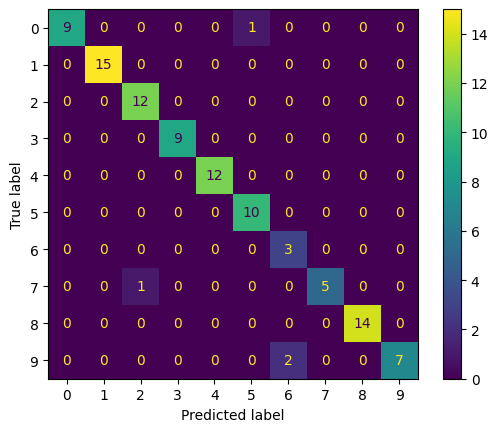

In [15]:
poly_pred_val = poly.predict(val_x)
poly_accuracy_val = accuracy_score(val_y, poly_pred_val)
poly_f1_val = f1_score(val_y, poly_pred_val, average='weighted')
cm = confusion_matrix(val_y, poly_pred_val,labels=poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly.classes_)
disp.plot()
print('Accuracy (POLY Kernel): ', "%.2f" % (poly_accuracy_val*100))
print('F1 (POLY Kernel): ', "%.2f" % (poly_f1_val*100))

Accuracy (Poly2 Kernel with degree 2):  95.47
F1 (Poly2 Kernel with degree 2):  95.48


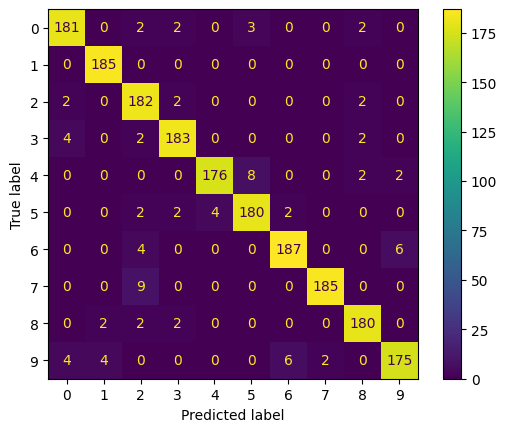

In [16]:
# changing the degree to 2 has boosted the performance a bit
poly_pred_test = poly.predict(test_x)
poly_accuracy_test = accuracy_score(test_y, poly_pred_test)
poly_f1_test = f1_score(test_y, poly_pred_test, average='weighted')
cm = confusion_matrix(test_y, poly_pred_test,labels=poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly.classes_)
disp.plot()
print('Accuracy (Poly2 Kernel with degree 2): ', "%.2f" % (poly_accuracy_test*100))
print('F1 (Poly2 Kernel with degree 2): ', "%.2f" % (poly_f1_test*100))

In [17]:
# generating classification report
from sklearn.metrics import classification_report
report = classification_report(test_y,poly_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       190
           1       0.97      1.00      0.98       185
           2       0.90      0.97      0.93       188
           3       0.96      0.96      0.96       191
           4       0.98      0.94      0.96       188
           5       0.94      0.95      0.94       190
           6       0.96      0.95      0.95       197
           7       0.99      0.95      0.97       194
           8       0.96      0.97      0.96       186
           9       0.96      0.92      0.94       191

    accuracy                           0.95      1900
   macro avg       0.96      0.95      0.95      1900
weighted avg       0.96      0.95      0.95      1900



In [19]:
# create the svm classifier to show the learning curve of the model
from sklearn.model_selection import learning_curve
from sklearn.model_selection import  ShuffleSplit
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# add noisy features
# Add noisy features
random_state = np.random.RandomState(0)

# Use label_binarize to be multi-label like settings
Y = label_binarize(Y_data, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_data, Y, test_size=0.5, random_state=random_state
)

classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), poly)
)
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

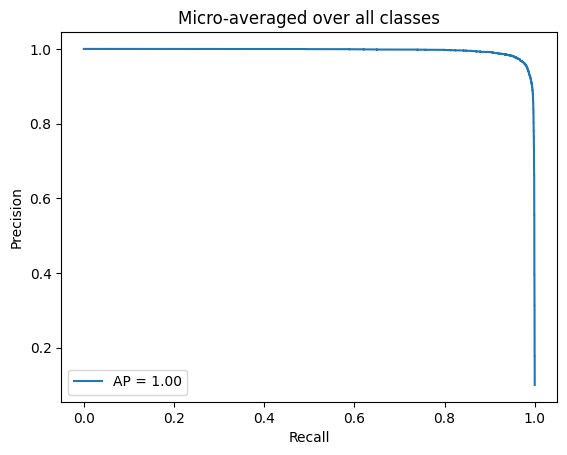

In [21]:
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

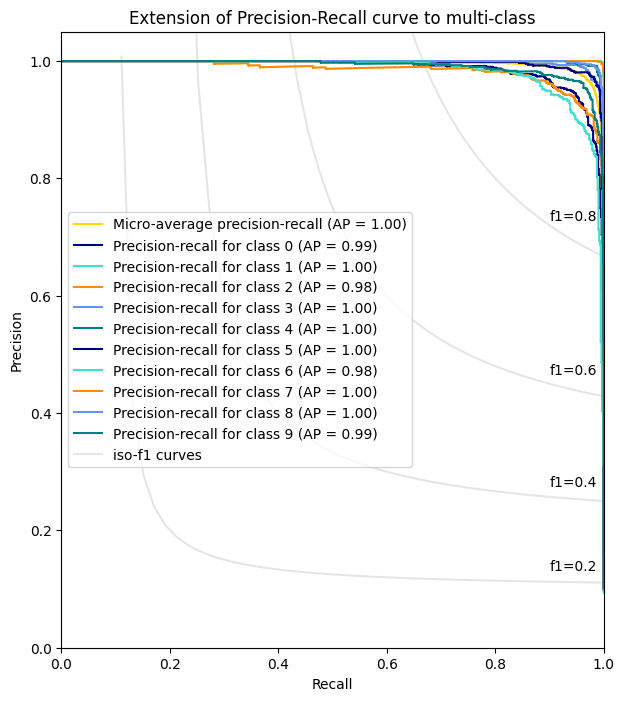

In [22]:
import matplotlib.pyplot as plt
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()